# Detección automática de carcinoma ductal invasivo en imagenes de diapositiva completa con redes neuronales convolucionales

Presentado por:
- Brian Felipe Sarmiento Valencia
- Miguel Angel Rosales Parra

## Autores

- Angel Cruz-Roa (Universidad Nacional de Colombia, Bogotá, Colombia)
- Ajay Basavanhally (Rutgers University, Piscataway, NJ, USA)
- Fabio González (Universidad Nacional de Colombia, Bogotá, Colombia)
- Hannah Gilmore (University Hospitals, Cleveland, OH, USA)
- Michael Feldman (Hospital of the University of Pennsylvania, Philadelphia, PA, USA)
- Shridar Ganesan (Cancer Institute of New Jersey, New Brunswick, NJ, USA)
- Natalie Shih (Hospital of the University of Pennsylvania, Philadelphia, PA, USA)
- John Tomaszewski (University at Buffalo, The State University of New York, Buffalo, NY USA)
- Anant Madabhushi (Case Western Reserve University, Cleveland, OH, USA)

## Resumen

[Este artículo](https://www.researchgate.net/publication/263052166_Automatic_detection_of_invasive_ductal_carcinoma_in_whole_slide_images_with_Convolutional_Neural_Networks) presenta un enfoque de aprendizaje profundo para la detección automática y el análisis visual de regiones de tejido de carcinoma ductal invasivo (IDC) en imágenes de diapositivas completas (WSI) de cáncer de mama (BCa). [Aquí](http://www.andrewjanowczyk.com/use-case-6-invasive-ductal-carcinoma-idc-segmentation/) se encuentra los datos y un resumen.

### Glosario
- *Imágenes histopatológicas:* Las imágenes histopatológicas son imágenes microscópicas de tejidos biológicos que han sido procesados y teñidos con colorantes especiales para mostrar la estructura y la composición de las células y los tejidos. Estas imágenes se utilizan comúnmente en el campo de la patología, que es la rama de la medicina que se encarga del estudio de las enfermedades a través del examen de los tejidos y las células.
- *Patología digital:* La patología digital también conocida como patología virtual o patología de imagen, es una rama de la patología que se basa en el análisis de imágenes digitales de tejidos biológicos, en lugar del análisis de muestras de tejido en un microscopio óptico convencional. Esta técnica se utiliza para el diagnóstico, la investigación y la educación en el campo de la patología
- *Invasive ductal carcinoma (IDC):* Carcinoma ductal invasivo
- *whole slide images (WSI):* Imágenes de diapositivas completas
- *breast cancer (BCa):* Cánceres de mama

## Introducción

El presente trabajo (notebook de Jupyter) tiene como objetivo replicar un modelo de CNN que se hizo para detectar un tipo de Cáncer de mama por medio de imágenes, a continuación se presentan una introducción o resumen que da contexto del problema.

- El carcinoma ductal invasivo es un tipo de cáncer de seno que se origina en los conductos de leche de la mama y se extiende a través de las paredes de los conductos hacia el tejido mamario circundante. El término "invasivo" significa que las células cancerosas han penetrado en el tejido mamario fuera del conducto y pueden diseminarse a otras partes del cuerpo a través del sistema linfático o el torrente sanguíneo.

- El carcinoma ductal invasivo (CDI) es el subtipo fenotípico más común de todos los cánceres de mama (BCa) y comprende casi el 80% de ellos.
- El primer paso en la caracterización histopatológica del tejido mamario resecado es distinguir entre regiones de tejidos correspondientes a tumores invasivos y tejidos no invasivos o saludables
- El enfoque utiliza una clasificación basada en DL en regiones de tejido cuadradas de WSI obtenidas mediante muestreo regular, lo que permite la aplicación del clasificador en toda la superficie de la WSI. 
- las regiones de tejido se utilizan para la clasificación en el enfoque de aprendizaje profundo. Para ello, se utilizan técnicas de muestreo regular de la imagen completa de histopatología del cáncer de mama (WSI), de manera que se obtienen regiones de tejido cuadradas de tamaño similar. Estas regiones de tejido son luego utilizadas para entrenar el algoritmo de clasificación basado en DL. La idea detrás de utilizar regiones de tejido cuadradas obtenidas por muestreo regular es que esto permite una clasificación más precisa y eficiente, en lugar de clasificar la imagen completa de una sola vez. 

![Texto alternativo de la imagen](Muestreo.PNG)

- Por último, se compara nuestro enfoque de aprendizaje profundo con otros modelos.



## Descripción de los datos

El conjunto de datos original consistía en diapositivas de histopatología BCa digitalizadas de 162 mujeres diagnosticadas con IDC en el Hospital de la Universidad de Pensilvania y el Instituto del Cáncer de Nueva Jersey, en otras palabras, son 162 imágenes de diapositivas de montaje completo de muestras de cáncer de mama (BCA) escaneadas a 40x. A partir de eso, se extrajeron 277,524 parches de tamaño 50 x 50 (198,738 IDC negativo y 78,786 IDC positivo) (Como se puede ver hay un desbalanceo de datos). **Se clasifica 1 a los parches IDC y 0 a los No IDC**

![Texto alternativo de la imagen](Clasificacion.PNG)

## Metodología

### Image patch sampling

Cada WSI se divide en parches de imagen no superpuestos de 100x100 **(Para el caso de este notebook se utilizan imágenes de 50x50)** píxeles mediante muestreo de cuadrícula. Se descartan los parches con tejido graso o fondo de diapositiva. Para fines de entrenamiento, las regiones que contienen IDC se anotan manualmente por un patólogo y se utilizan para generar una máscara de anotación binaria. Se considera que un parche de imagen es una muestra positiva si al menos el 80% del parche está dentro de la máscara de anotación, de lo contrario se utiliza como muestra negativa.

### Convolutional Neural Networks

Elementos que componen la Red Reuronal Convoluvional

- Procesamiento de parches: cada parche se normaliza por medio del maximo
- Capa Convolucional: Se aplica convoluciones 2D de los mapas de características de entrada y función de activación *Relu*
- Capa de pooling: Esta etapa permite reducir la dimensión original de la representación de la imagen a través de una estrategia de submuestreo que soporta invariantes locales del espacio, para este caso se utilizó el *Maxpooling*
- Capa totalmente conectada: Esta capa se aplica típicamente en la capa superior de una arquitectura de CNN para capturar relaciones complejas entre características de alto nivel
- Capa Flatten: Se utiliza para convertir los mapas de características bidimensionales (también conocidos como tensores 2D) producidos por las capas convolucionales y de pooling en un vector unidimensional. Esto se hace para poder alimentar los datos a una capa densa completamente conectada, que requiere una entrada unidimensional.
- Capa Dropout: Es una técnica de regularización utilizada en redes neuronales que ayuda a prevenir el sobreajuste. Durante el entrenamiento, el Dropout aleatoriamente "desactiva" algunas neuronas en la red, lo que significa que su salida se establece en cero.
- Capa Dense: La capa Dense en una red neuronal es una capa completamente conectada, en la que cada nodo en la capa anterior está conectado a cada nodo en la capa actual
- Algoritmo de optimización: Adam
- Función de pérdida: binary_crossentropy
- Métrica utilizada en cada época: Accuracy

## Arquitectura
- Primera capa convolucional, con 32 Kernel's de tamaño (3,3), función de activación RELU y cuyo imput es de tamaño (50,50,3)
- Primera capa de pooling por el método de MaxPooling2D y tamaño (2, 2)
- Segunda capa convolucional, con 64 Kernel's de tamaño (3,3), función de activación RELU
- Segunda capa de pooling por el método de MaxPooling2D y tamaño (2, 2)
- Tercera capa convolucional, con 128 Kernel's de tamaño (3,3), función de activación RELU
- Cuarta capa convolucional, con 256 Kernel's de tamaño (3,3), función de activación RELU
- Capa Flatten, produce un vector unidimensional
- Primera capa Dropout con parámetro 0.5, es decir, desactiva la mitad de las neuronas de la red
- Primera capa densa con 128 neuronas y función de activación RELU
- Segunda capa Dropout con parámetro 0.5, es decir, desactiva la mitad de las neuronas de la red
- Segunda capa densa con 128 neuronas y función de activación RELU
- Tercer y última capa densa con 1 neurona y función de activación sigmoid que genera la clasificación

A continuación se presenta una imagen ilustrativa del modelo que utiliza el artículo, sin embargo el modelo que se propone tienen cambios respecto al original

![NNC](Modelo2.PNG)

## Métrica

La métrica utilizada por los investigadores del artículo es la medida de rendimiento de clasificación avanzada *F1* puesto que esta métrica es una compensación para minimizar simultáneamente los falsos-positivos (FP) y falsos negativos (FN).

Recordemos que *F1* se define como 

$$F1 =  2\frac{precision*recall}{precision+recall}$$
donde,
$$precision = \frac{TP}{TP+FP}$$
$$recall = \frac{TP}{TP+FN}$$
Nota: en el artículo también utilizan la métrica BAC (acurracy balanceado)

## Comparación y Resultados

En el artículo comparan el modelo CNN con otros modelos, los otros modelos se crearon por medio de clasificadores de árboles aleatorios (Random Forest Classifier) partir de características artesanales para evaluar propiedades visuales de las imágenes de histopatología, como la apariencia del tejido, la disposición morfológica y arquitectónica de las células mediante el uso de descriptores basados en color, textura y gráficos, entre otros.

![características](Tabla_comparacion.PNG)

Resultados de las métricas de los diferentes modelos

![medidas](Tabla_comparacion_metricas.PNG)

Como se puede observar en la columna de F1 el modelo CNN es el que tiene mejor puntaje con un *0.7180* lo cual indica que las redes neuronales convolucionales son mejores respecto a otros modelos, una gran innovación y una gran herramienta para clasificar. Sin embargo, como para este trabajo se propuso una red convolucional diferente se observará que la métrica F1 mejora.

## Código

### Importe y transformación de los datos

Importe de los datos o imágenes

In [2]:
import pandas as pd

In [1]:
from glob import glob
imagenes = glob('C:/Users/USUARIO WINDOWS/OneDrive - Universidad Nacional de Colombia/Documentos/Maestria Actuaria/segundo_semestre/Redes_Neuronales/proyecto/**/*.png', recursive=True)

Todas las imágenes se convierten a imágenes a color de 50x50 pixeles

In [44]:
import cv2
import numpy as np
def procesarImg(lidx,uidx):
    alto = 50
    ancho = 50
    canales = 3
    x = []
    y = []
    #imagenes[0]
    for img in imagenes[lidx:uidx]:
        imagenFull = cv2.imread(img)
        imageRes = (cv2.resize(imagenFull, (alto,ancho), interpolation=cv2.INTER_CUBIC))
        x.append(imageRes)
        if img[-10:]=="class1.png":
            y.append(0)
        elif img[-10:]=="class0.png":
            y.append(1)
        else:
            return
    return x,y

Se procesan 50000 imágenes

In [48]:
X, Y = procesarImg(7,50007)
X = np.array(X)/255

Ejemplo de imágen que se utilizará para crear la CNN

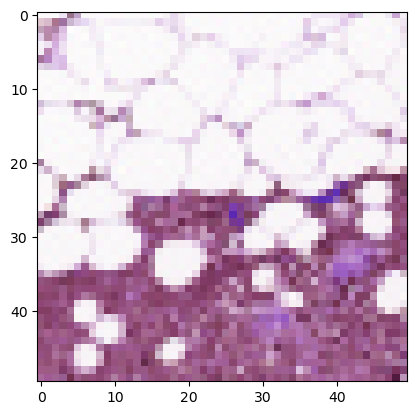

In [51]:
import matplotlib.pyplot as plt
ejemplo=500
plt.imshow(X[ejemplo])
plt.show()

Se separan los datos en entrenamiento y test

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)
X_train.shape, X_test.shape #Dimensiones del conjunto de entrenamiento y testeo

((42500, 50, 50, 3), (7500, 50, 50, 3))

### Muestreo Aleatorio

Los datos están muy desbalanceados, hay el triple de datos de la clase 1 que la clase 0. Para lidiar con esto, vamos a hacer un muestreo de los datos para que queden balanceados

Se aplica un reshape para volver los tensores a vectores

In [53]:
X_trainFlat = X_train.reshape(X_train.shape[0], -1)
X_testFlat = X_test.reshape(X_test.shape[0], -1)

Se aplica el método sub-sampling para balancear la base de datos

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from keras.utils import to_categorical
random_under_sampler = RandomUnderSampler(sampling_strategy='majority')
#random_under_sampler = RandomUnderSampler(random_state=42)
X_trainRos, Y_trainRos = random_under_sampler.fit_resample(X_trainFlat, y_train)
X_testRos, Y_testRos = random_under_sampler.fit_resample(X_testFlat, y_test)
X_trainRos = X_trainRos.reshape((-1,50,50,3))
X_testRos = X_testRos.reshape((-1,50,50,3))
#Y_trainRos=to_categorical(Y_trainRos)
#Y_testRos=to_categorical(Y_testRos)
#(Y_trainRos==1).sum(),(Y_trainRos==0).sum()
Y_trainRos = np.array(Y_trainRos)
Y_testRos = np.array(Y_testRos)
#sum(Y_trainRos), len(Y_trainRos)-sum(Y_trainRos)

c:\Users\USUARIO WINDOWS\anaconda3\envs\BFSV\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Se verifican que la cantidad de datos de los dos estados se a igual tanto en el conjunto de datos de entrenamiento como de testeo

In [67]:
tamanos = {"Tamaño conjunto de entreamiento X":str(X_trainRos.shape), "Tamaño conjunto de testeo X":str(X_testRos.shape),
           "Tamaño conjunto de entreamiento Y":str(Y_trainRos.shape), "Tamaño conjunto de testeo Y":str(Y_testRos.shape),
           "Cantidad de clasificados con 1 conjunto de entrenamiento": str(sum(Y_trainRos)),  
           "Cantidad de clasificados con 0 conjunto de entrenamiento": str(len(Y_trainRos)-sum(Y_trainRos)),
           "Cantidad de clasificados con 1 conjunto de testeo": str(sum(Y_testRos)),
           "Cantidad de clasificados con 0 conjunto de testeo": str(len(Y_testRos)-sum(Y_testRos))}
pd.DataFrame(tamanos, index=[0])

,Tamaño conjunto de entreamiento X,Tamaño conjunto de testeo X,Tamaño conjunto de entreamiento Y,Tamaño conjunto de testeo Y,Cantidad de clasificados con 1 conjunto de entrenamiento,Cantidad de clasificados con 0 conjunto de entrenamiento,Cantidad de clasificados con 1 conjunto de testeo,Cantidad de clasificados con 0 conjunto de testeo
0,"(20478, 50, 50, 3)","(3682, 50, 50, 3)","(20478,)","(3682,)",10239,10239,1841,1841


## Red Convolucional

Ahora vamos a construir la red convolucional

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [69]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten()) 
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [74]:
print("Cantidad de parametros")
32*(3*3*3+1),64*(3*3*32+1),128*(3*3*64+1),256*(3*3*128+1),12544*128+128,128*128+128,128*1+1

Cantidad de parametros


(896, 18496, 73856, 295168, 1605760, 16512, 129)

Como es un problema de clasificación binaria entonces vamos a usar la entropía cruzada como función de perdida y métrica accuracy

In [121]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1])

Podemos aumentar los datos mediante rotaciones y reflexiones

In [120]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True, #Booleano. Establecer entrada significa 0 sobre el conjunto de datos, en cuanto a características.
    featurewise_std_normalization=True, #Booleano. Divida las entradas por std de la conjunto de datos, en cuanto a características.
    rotation_range=180, #Int. Rango de grados para rotaciones aleatorias.
    horizontal_flip=True, #Booleano. Voltee aleatoriamente las entradas horizontalmente.
    vertical_flip = True) #	Booleano. Voltee aleatoriamente las entradas verticalmente.

Usaremos early stopping y haremos un checkpoint del modelo cada que la pérdida de validación disminuya

In [122]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, mode='min') #Técnica de regularización utilizada para evitar el sobreajuste y
#detiene el entrenamiento del modelo antes de que se alcance el número máximo de épocas especificado si no se 
#observa una mejora en el rendimiento del modelo durante un cierto número de épocas consecutivas
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True) #Guarda los pesos del mejor modelo

### Entrenamiento del modelo CNN

In [123]:
training = model.fit(datagen.flow(X_trainRos,Y_trainRos,batch_size=256),steps_per_epoch=len(X_trainRos) / 256,
                      epochs=50,validation_data=(X_testRos, Y_testRos), verbose=1, callbacks=[early_stopping_monitor, model_checkpoint])

c:\Users\USUARIO WINDOWS\anaconda3\envs\BFSV\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\Users\USUARIO WINDOWS\anaconda3\envs\BFSV\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
80/79 [==============================] - ETA: 0s - loss: 0.3909 - accuracy: 0.8350
Epoch 00001: val_loss improved from inf to 0.38054, saving model to best_model.h5
80/79 [==============================] - 55s 681ms/step - loss: 0.3909 - accuracy: 0.8350 - val_loss: 0.3805 - val_accuracy: 0.8411
Epoch 2/50
80/79 [==============================] - ETA: 0s - loss: 0.3754 - accuracy: 0.8444
Epoch 00002: val_loss improved from 0.38054 to 0.36981, saving model to best_model.h5
80/79 [==============================] - 48s 602ms/step - loss: 0.3754 - accuracy: 0.8444 - val_loss: 0.3698 - val_accuracy: 0.8498
Epoch 3/50
80/79 [==============================] - ETA: 0s - loss: 0.3813 - accuracy: 0.8425
Epoch 00003: val_loss did not improve from 0.36981
80/79 [==============================] - 51s 641ms/step - loss: 0.3813 - accuracy: 0.8425 - val_loss: 0.3807 - val_accuracy: 0.8490
Epoch 4/50
80/79 [==============================] - ETA: 0s - loss: 0.3843 - accuracy: 0.8409
Epoch 000

### Gráficas del histórico de la métrica accuracy y de la función de perdida

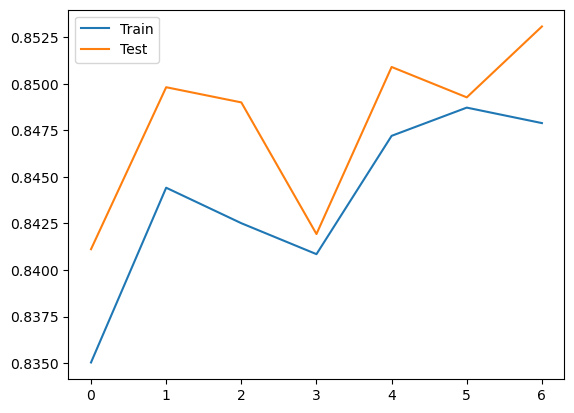

In [124]:
plt.plot(training.history['accuracy'],label='Train')
plt.plot(training.history['val_accuracy'],label='Test')
plt.legend()
plt.show()

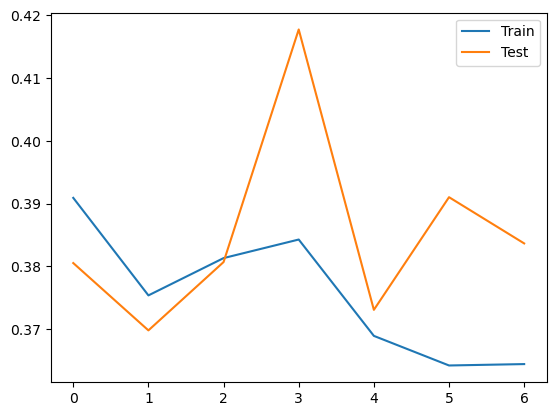

In [125]:
plt.plot(training.history['loss'],label='Train')
plt.plot(training.history['val_loss'],label='Test')
plt.legend()

### Validación

In [126]:
from keras.models import load_model
from sklearn import metrics
model = load_model('best_model.h5')
y_pred = model.predict_classes(X_testRos)
cm = metrics.confusion_matrix(y_true=Y_testRos, y_pred=y_pred)
cm1 = cm/sum(cm)*100

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Esta función imprime y traza la matriz de confusión.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')

### Matriz de confunsión

(array([[1598,  243],
        [ 310, 1531]], dtype=int64),
 None)

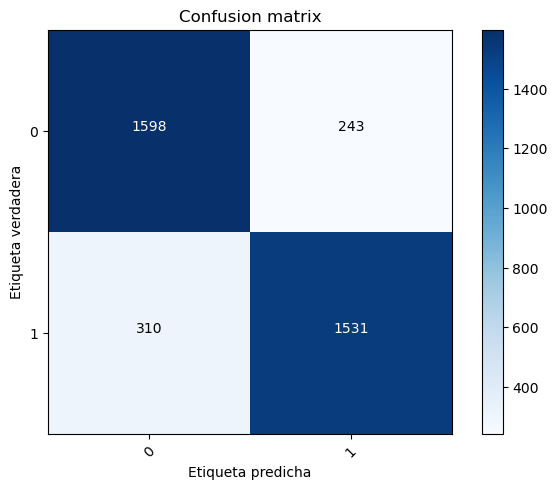

In [128]:
cm, plot_confusion_matrix(cm, ["0","1"], normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)

### Matriz de confusión porcentual

In [129]:
cm1

array([[83.75262055, 13.69785795],
       [16.24737945, 86.30214205]])

### Métrica F1

In [130]:
from sklearn.metrics import f1_score
pd.DataFrame({"F1":f1_score(y_true=Y_testRos, y_pred=y_pred)*100}, index=[0])

,F1
0,84.702628


## Conclusiones

- La detección automatizada del carcinoma ductal invasivo es un problema desafiante y relevante para el diagnóstico del cáncer de mama.
- La mayoría de los trabajos anteriores en la detección de tumores en histopatología abordan este problema combinando diferentes tipos de características diseñadas a mano y algoritmos de aprendizaje automático. En contraste, se presenta un nuevo marco de aprendizaje profundo para la detección automatizada de regiones IDC en WSI de histopatología de cáncer de mama.
- Se presenta una nueva aplicación de la CNN en patología digital para el análisis de imágenes visuales y se compara con características diseñadas a mano bien conocidas, se evidencia que este nuevo enfoque es mucho mejor que otro modelos por medio de la métrica *F1*
- Este enfoque no hace suposiciones de antemano sobre las características visuales relevantes para representar el contenido de la imagen asociado con el tejido IDC lo cual genera una ventaja.
- En este problema, la confiabilidad, la velocidad y la reproducibilidad del clasificador fueron de mayor importancia en comparación con la interpretabilidad de las características, un criterio que se logró con éxito con nuestro clasificador CNN.
- La característica más notable de este enfoque es su reproducibilidad en diferentes datos WSI no vistos, que está muy cerca de las anotaciones manuales binarias subjetivas de un patólogo capacitado, proporcionando soporte cuantitativo de sus decisiones. 
-  El trabajo futuro explorará los efectos de los modelos de CNN con arquitecturas más profundas (es decir, más capas y neuronas) y validación en cohortes más grandes.


## Bibliografía

- Automatic detection of invasive ductal carcinoma in whole slide images with Convolutional Neural Networks [Link artículo](https://www.researchgate.net/publication/263052166_Automatic_detection_of_invasive_ductal_carcinoma_in_whole_slide_images_with_Convolutional_Neural_Networks)

- [Pagina sobre más información del artículo y los datos](http://www.andrewjanowczyk.com/use-case-6-invasive-ductal-carcinoma-idc-segmentation/)